### Stabilité des modèles

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from sklearn.metrics import silhouette_score, adjusted_rand_score
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
df = pd.read_csv(
    r'C:\Users\Damien\Desktop\Data Scientist\P5\Dataset\olist_stab.csv')

In [3]:
df

,product_id,payment_type,customer_unique_id,Recency,frequence_achat,dist_cust_seller,product_category_name_english,payment_value,review_score,delivery_time,...,Recency_t,Frequency_t,Monetary_t,model1_cluster,Delivery_log,Distance_log,Delivery_t,Distance_t,model2_cluster,model3_cluster
0,4244733e06e7ecb4970a6e2683c13e61,1,871766c5855e863f6eccc05f988b23cb,399,1,301.006080,other,72.19,5,7.0,...,0.797254,-0.239064,-0.449542,1,2.079442,5.710447,-0.544980,-0.047954,3,0
1,4244733e06e7ecb4970a6e2683c13e61,0,0fb8e3eab2d3e79d92bb3fffbb97f188,476,1,943.873300,other,73.86,5,15.0,...,1.082811,-0.239064,-0.422639,1,2.772589,6.851051,0.591591,0.785536,1,0
2,4244733e06e7ecb4970a6e2683c13e61,1,3419052c8c6b45daf79c1e426f9e9bcb,152,1,287.307755,other,83.23,4,17.0,...,-0.761534,-0.239064,-0.282011,3,2.890372,5.664029,0.784723,-0.081875,0,0
3,4244733e06e7ecb4970a6e2683c13e61,1,e7c828d22c0682c1565252deefbe334d,442,1,608.577657,other,75.07,5,8.0,...,0.962869,-0.239064,-0.403519,1,2.197225,6.412766,-0.351848,0.465262,3,0
4,4244733e06e7ecb4970a6e2683c13e61,1,0bb98ba72dcc08e95f9d8cc434e9a2cc,433,1,207.980995,other,72.19,5,14.0,...,0.929577,-0.239064,-0.449542,1,2.708050,5.342243,0.485766,-0.317018,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94238,3a96bcbf644a5d390107570628568026,1,e839774c9d31569dba47946296e58b33,84,1,74.994369,media,27.20,5,2.0,...,-1.714925,-0.239064,-1.586832,3,1.098612,4.330659,-2.153271,-1.056227,2,1
94239,2b54fb9a4acf707537eb53eb2458c241,1,8c3c961a52bb5a0ffbce1d4e6d25cd67,81,1,623.993701,media,77.50,5,6.0,...,-1.773207,-0.239064,-0.366022,3,1.945910,6.437742,-0.763935,0.483512,0,0
94240,9c313adb4b38a55b092f53f83f78be9e,1,8d80e477643ec569b24592ce3d9dfc4c,86,1,254.171222,media,84.63,3,4.0,...,-1.677203,-0.239064,-0.262354,3,1.609438,5.541935,-1.315657,-0.171094,0,0
94241,5aa0d6ed4e6c0995d62090cd82cde89a,0,428f4721a509be8c52de6ec2900ba918,55,1,289.354874,media,24.69,5,5.0,...,-2.391786,-0.239064,-1.697993,3,1.791759,5.671104,-1.016700,-0.076704,2,0


## Model 2 (5 features avec log + StandardScaler)

#### Stabiité du modèle

**A 180 jours**

In [4]:
df_stab_ref = df[df['Recency'] < 180]

In [5]:
customers2_ref = pd.DataFrame()
customers2_ref["Recency"] = df_stab_ref['Recency_t']
customers2_ref["Frequence"] = df_stab_ref['Frequency_t']
customers2_ref["Monetary"] = df_stab_ref['Monetary_t']
customers2_ref["Delivery"] = df_stab_ref['Delivery_t']
customers2_ref["Distance"] = df_stab_ref['Distance_t']

customers2_ref.reset_index(inplace=True)

In [6]:
n_comp = 2
pca = PCA(n_components=n_comp)

In [7]:
model_ref = KMeans(n_clusters=4)
data_pca_ref = pca.fit_transform(customers2_ref)
model_ref.fit(data_pca_ref)

KMeans(n_clusters=4)

**A 210 jours**

In [8]:
df_stab_1M = df[df['Recency'] < 210]

In [9]:
customers2_1M = pd.DataFrame()
customers2_1M["Recency"] = df_stab_1M['Recency_t']
customers2_1M["Frequence"] = df_stab_1M['Frequency_t']
customers2_1M["Monetary"] = df_stab_1M['Monetary_t']
customers2_1M["Delivery"] = df_stab_1M['Delivery_t']
customers2_1M["Distance"] = df_stab_1M['Distance_t']

customers2_1M.reset_index(inplace=True)

In [10]:
model_1M = KMeans(n_clusters=4)
data_pca_1M = pca.fit_transform(customers2_1M)
model_1M.fit(data_pca_1M)
label_ref_1M = model_ref.predict(data_pca_1M)
label_1M = model_1M.predict(data_pca_1M)

**A 240 jours**

In [11]:
df_stab_2M = df[df['Recency'] < 240]

In [12]:
customers2_2M = pd.DataFrame()
customers2_2M["Recency"] = df_stab_2M['Recency_t']
customers2_2M["Frequence"] = df_stab_2M['Frequency_t']
customers2_2M["Monetary"] = df_stab_2M['Monetary_t']
customers2_2M["Delivery"] = df_stab_2M['Delivery_t']
customers2_2M["Distance"] = df_stab_2M['Distance_t']

customers2_2M.reset_index(inplace=True)

In [13]:
model_2M = KMeans(n_clusters=4)
data_pca_2M = pca.fit_transform(customers2_2M)
model_2M.fit(data_pca_2M)
label_ref_2M = model_ref.predict(data_pca_2M)
label_2M = model_2M.predict(data_pca_2M)

**A 270 jours**

In [14]:
df_stab_3M = df[df['Recency'] < 270]

In [15]:
customers2_3M = pd.DataFrame()
customers2_3M["Recency"] = df_stab_3M['Recency_t']
customers2_3M["Frequence"] = df_stab_3M['Frequency_t']
customers2_3M["Monetary"] = df_stab_3M['Monetary_t']
customers2_3M["Delivery"] = df_stab_3M['Delivery_t']
customers2_3M["Distance"] = df_stab_3M['Distance_t']

customers2_3M.reset_index(inplace=True)

In [16]:
model_3M = KMeans(n_clusters=4)
data_pca_3M = pca.fit_transform(customers2_3M)
model_3M.fit(data_pca_3M)
label_ref_3M = model_ref.predict(data_pca_3M)
label_3M = model_3M.predict(data_pca_3M)

**A 300 jours**

In [17]:
df_stab_4M = df[df['Recency'] < 300]

In [18]:
customers2_4M = pd.DataFrame()
customers2_4M["Recency"] = df_stab_4M['Recency_t']
customers2_4M["Frequence"] = df_stab_4M['Frequency_t']
customers2_4M["Monetary"] = df_stab_4M['Monetary_t']
customers2_4M["Delivery"] = df_stab_4M['Delivery_t']
customers2_4M["Distance"] = df_stab_4M['Distance_t']

customers2_4M.reset_index(inplace=True)

In [19]:
model_4M = KMeans(n_clusters=4)
data_pca_4M = pca.fit_transform(customers2_4M)
model_4M.fit(data_pca_4M)
label_ref_4M = model_ref.predict(data_pca_4M)
label_4M = model_4M.predict(data_pca_4M)

**A 330 jours**

In [20]:
df_stab_5M = df[df['Recency'] < 330]

In [21]:
customers2_5M = pd.DataFrame()
customers2_5M["Recency"] = df_stab_5M['Recency_t']
customers2_5M["Frequence"] = df_stab_5M['Frequency_t']
customers2_5M["Monetary"] = df_stab_5M['Monetary_t']
customers2_5M["Delivery"] = df_stab_5M['Delivery_t']
customers2_5M["Distance"] = df_stab_5M['Distance_t']

customers2_5M.reset_index(inplace=True)

In [22]:
model_5M = KMeans(n_clusters=4)
data_pca_5M = pca.fit_transform(customers2_5M)
model_5M.fit(data_pca_5M)
label_ref_5M = model_ref.predict(data_pca_5M)
label_5M = model_5M.predict(data_pca_5M)

**A 360 jours**

In [23]:
df_stab_6M = df[df['Recency'] < 360]

In [24]:
customers2_6M = pd.DataFrame()
customers2_6M["Recency"] = df_stab_6M['Recency_t']
customers2_6M["Frequence"] = df_stab_6M['Frequency_t']
customers2_6M["Monetary"] = df_stab_6M['Monetary_t']
customers2_6M["Delivery"] = df_stab_6M['Delivery_t']
customers2_6M["Distance"] = df_stab_6M['Distance_t']

customers2_6M.reset_index(inplace=True)

In [25]:
model_6M = KMeans(n_clusters=4)
data_pca_6M = pca.fit_transform(customers2_6M)
model_6M.fit(data_pca_6M)
label_ref_6M = model_ref.predict(data_pca_6M)
label_6M = model_6M.predict(data_pca_6M)

**A 450 jours**

In [26]:
df_stab_9M = df[df['Recency'] < 450]

In [27]:
customers2_9M = pd.DataFrame()
customers2_9M["Recency"] = df_stab_9M['Recency_t']
customers2_9M["Frequence"] = df_stab_9M['Frequency_t']
customers2_9M["Monetary"] = df_stab_9M['Monetary_t']
customers2_9M["Delivery"] = df_stab_9M['Delivery_t']
customers2_9M["Distance"] = df_stab_9M['Distance_t']

customers2_9M.reset_index(inplace=True)

In [28]:
model_9M = KMeans(n_clusters=4)
data_pca_9M = pca.fit_transform(customers2_9M)
model_9M.fit(data_pca_9M)
label_ref_9M = model_ref.predict(data_pca_9M)
label_9M = model_9M.predict(data_pca_9M)

**A 540 jours**

In [29]:
df_stab_12M = df[df['Recency'] < 540]

In [30]:
customers2_12M = pd.DataFrame()
customers2_12M["Recency"] = df_stab_12M['Recency_t']
customers2_12M["Frequence"] = df_stab_12M['Frequency_t']
customers2_12M["Monetary"] = df_stab_12M['Monetary_t']
customers2_12M["Delivery"] = df_stab_12M['Delivery_t']
customers2_12M["Distance"] = df_stab_12M['Distance_t']

customers2_12M.reset_index(inplace=True)

In [31]:
model_12M = KMeans(n_clusters=4)
data_pca_12M = pca.fit_transform(customers2_12M)
model_12M.fit(data_pca_12M)
label_ref_12M = model_ref.predict(data_pca_12M)
label_12M = model_9M.predict(data_pca_12M)

In [32]:
print("ARI à 1 mois :",
      adjusted_rand_score(label_ref_1M,
                          label_1M))
print("ARI à 2 mois :",
      adjusted_rand_score(label_ref_2M,
                          label_2M))
print("ARI à 3 mois :",
      adjusted_rand_score(label_ref_3M,
                          label_3M))
print("ARI à 4 mois :",
      adjusted_rand_score(label_ref_4M,
                          label_4M))
print("ARI à 5 mois :",
      adjusted_rand_score(label_ref_5M,
                          label_5M))
print("ARI à 6 mois :",
      adjusted_rand_score(label_ref_6M,
                          label_6M))
print("ARI à 9 mois :",
      adjusted_rand_score(label_ref_9M,
                          label_9M))
print("ARI à 12 mois :",
      adjusted_rand_score(label_ref_12M,
                          label_12M))

ARI à 1 mois : 0.9591383318630747
ARI à 2 mois : 0.9352013729973802
ARI à 3 mois : 0.9108033533858043
ARI à 4 mois : 0.8720684862978174
ARI à 5 mois : 0.8392139481148367
ARI à 6 mois : 0.8368782324784602
ARI à 9 mois : -2.3508925283329716
ARI à 12 mois : -5.330493578840964


D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


In [33]:
data_ari = pd.DataFrame()
data_ari["Month"] = [1, 2, 3, 4, 5, 6, 9]
data_ari["Adjusted Rand Index"] = [0.93, 0.91, 0.85, 0.84, 0.84, 0.84, -2.30]

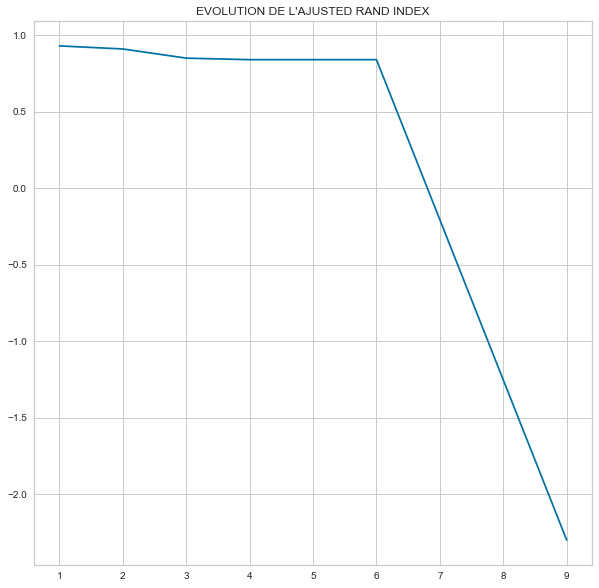

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(data_ari["Month"], data_ari["Adjusted Rand Index"])
plt.title("EVOLUTION DE L'AJUSTED RAND INDEX")
plt.show()

### Model 3 (8 features avec log + StandardScaler)

#### Stabilité du modèle

**A 180 jours**

In [35]:
df_stab_ref = df[df['Recency'] < 180]

In [36]:
customers3_ref = pd.DataFrame()
customers3_ref["Recency"] = df_stab_ref['Recency_t']
customers3_ref["Frequence"] = df_stab_ref['Frequency_t']
customers3_ref["Monetary"] = df_stab_ref['Monetary_t']
customers3_ref["Delivery"] = df_stab_ref['Delivery_t']
customers3_ref["Distance"] = df_stab_ref['Distance_t']
customers3_ref["Review"] = df_stab_ref['review_score']
customers3_ref["Riche"] = df_stab_ref['m_quartile']
customers3_ref["City"] = df_stab_ref['customer_city']
customers3_ref["Product"] = df_stab_ref['product_category_name_english']
customers3_ref.reset_index(inplace=True)

customers3_ref.reset_index(inplace=True)

In [37]:
km_cao_ref = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_ref.fit(customers3_ref)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31, cost: 208457.0


KModes(n_clusters=4, verbose=1)

**A 210 jours**

In [38]:
df_stab_1M = df[df['Recency'] < 210]

In [39]:
customers3_1M = pd.DataFrame()
customers3_1M["Recency"] = df_stab_1M['Recency_t']
customers3_1M["Frequence"] = df_stab_1M['Frequency_t']
customers3_1M["Monetary"] = df_stab_1M['Monetary_t']
customers3_1M["Delivery"] = df_stab_1M['Delivery_t']
customers3_1M["Distance"] = df_stab_1M['Distance_t']
customers3_1M["Review"] = df_stab_1M['review_score']
customers3_1M["Riche"] = df_stab_1M['m_quartile']
customers3_1M["City"] = df_stab_1M['customer_city']
customers3_1M["Product"] = df_stab_1M['product_category_name_english']
customers3_1M.reset_index(inplace=True)

customers3_1M.reset_index(inplace=True)

In [40]:
km_cao_1M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_1M.fit(customers3_1M)
label_ref_1M = km_cao_ref.predict(customers3_1M)
label_1M = km_cao_1M.predict(customers3_1M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 258938.0


**A 240 jours**

In [41]:
df_stab_2M = df[df['Recency'] < 240]

In [42]:
customers3_2M = pd.DataFrame()
customers3_2M["Recency"] = df_stab_2M['Recency_t']
customers3_2M["Frequence"] = df_stab_2M['Frequency_t']
customers3_2M["Monetary"] = df_stab_2M['Monetary_t']
customers3_2M["Delivery"] = df_stab_2M['Delivery_t']
customers3_2M["Distance"] = df_stab_2M['Distance_t']
customers3_2M["Review"] = df_stab_2M['review_score']
customers3_2M["Riche"] = df_stab_2M['m_quartile']
customers3_2M["City"] = df_stab_2M['customer_city']
customers3_2M["Product"] = df_stab_2M['product_category_name_english']
customers3_2M.reset_index(inplace=True)

customers3_2M.reset_index(inplace=True)

In [43]:
km_cao_2M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_2M.fit(customers3_2M)
label_ref_2M = km_cao_ref.predict(customers3_2M)
label_2M = km_cao_2M.predict(customers3_2M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 70, cost: 315106.0


**A 270 jours**

In [44]:
df_stab_3M = df[df['Recency'] < 270]

In [45]:
customers3_3M = pd.DataFrame()
customers3_3M["Recency"] = df_stab_3M['Recency_t']
customers3_3M["Frequence"] = df_stab_3M['Frequency_t']
customers3_3M["Monetary"] = df_stab_3M['Monetary_t']
customers3_3M["Delivery"] = df_stab_3M['Delivery_t']
customers3_3M["Distance"] = df_stab_3M['Distance_t']
customers3_3M["Review"] = df_stab_3M['review_score']
customers3_3M["Riche"] = df_stab_3M['m_quartile']
customers3_3M["City"] = df_stab_3M['customer_city']
customers3_3M["Product"] = df_stab_3M['product_category_name_english']
customers3_3M.reset_index(inplace=True)

customers3_3M.reset_index(inplace=True)

In [46]:
km_cao_3M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_3M.fit(customers3_3M)
label_ref_3M = km_cao_ref.predict(customers3_3M)
label_3M = km_cao_3M.predict(customers3_3M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3217, cost: 364717.0


**A 300 jours**

In [47]:
df_stab_4M = df[df['Recency'] < 300]

In [48]:
customers3_4M = pd.DataFrame()
customers3_4M["Recency"] = df_stab_4M['Recency_t']
customers3_4M["Frequence"] = df_stab_4M['Frequency_t']
customers3_4M["Monetary"] = df_stab_4M['Monetary_t']
customers3_4M["Delivery"] = df_stab_4M['Delivery_t']
customers3_4M["Distance"] = df_stab_4M['Distance_t']
customers3_4M["Review"] = df_stab_4M['review_score']
customers3_4M["Riche"] = df_stab_4M['m_quartile']
customers3_4M["City"] = df_stab_4M['customer_city']
customers3_4M["Product"] = df_stab_4M['product_category_name_english']
customers3_4M.reset_index(inplace=True)

customers3_4M.reset_index(inplace=True)

In [49]:
km_cao_4M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_4M.fit(customers3_4M)
label_ref_4M = km_cao_ref.predict(customers3_4M)
label_4M = km_cao_3M.predict(customers3_4M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 88, cost: 407499.0


**A 330 jours**

In [50]:
df_stab_5M = df[df['Recency'] < 330]

In [51]:
customers3_5M = pd.DataFrame()
customers3_5M["Recency"] = df_stab_5M['Recency_t']
customers3_5M["Frequence"] = df_stab_5M['Frequency_t']
customers3_5M["Monetary"] = df_stab_5M['Monetary_t']
customers3_5M["Delivery"] = df_stab_5M['Delivery_t']
customers3_5M["Distance"] = df_stab_5M['Distance_t']
customers3_5M["Review"] = df_stab_5M['review_score']
customers3_5M["Riche"] = df_stab_5M['m_quartile']
customers3_5M["City"] = df_stab_5M['customer_city']
customers3_5M["Product"] = df_stab_5M['product_category_name_english']
customers3_5M.reset_index(inplace=True)

customers3_5M.reset_index(inplace=True)

In [52]:
km_cao_5M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_5M.fit(customers3_5M)
label_ref_5M = km_cao_ref.predict(customers3_5M)
label_5M = km_cao_5M.predict(customers3_5M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3930, cost: 470388.0
Run 1, iteration: 2/100, moves: 13, cost: 470388.0


**A 360 jours**

In [53]:
df_stab_6M = df[df['Recency'] < 360]

In [54]:
customers3_6M = pd.DataFrame()
customers3_6M["Recency"] = df_stab_6M['Recency_t']
customers3_6M["Frequence"] = df_stab_6M['Frequency_t']
customers3_6M["Monetary"] = df_stab_6M['Monetary_t']
customers3_6M["Delivery"] = df_stab_6M['Delivery_t']
customers3_6M["Distance"] = df_stab_6M['Distance_t']
customers3_6M["Review"] = df_stab_6M['review_score']
customers3_6M["Riche"] = df_stab_6M['m_quartile']
customers3_6M["City"] = df_stab_6M['customer_city']
customers3_6M["Product"] = df_stab_6M['product_category_name_english']
customers3_6M.reset_index(inplace=True)

customers3_6M.reset_index(inplace=True)

In [55]:
km_cao_6M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_6M.fit(customers3_6M)
label_ref_6M = km_cao_ref.predict(customers3_6M)
label_6M = km_cao_6M.predict(customers3_6M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4192, cost: 506389.0


**A 450 jours**

In [56]:
df_stab_9M = df[df['Recency'] < 450]

In [57]:
customers3_9M = pd.DataFrame()
customers3_9M["Recency"] = df_stab_9M['Recency_t']
customers3_9M["Frequence"] = df_stab_9M['Frequency_t']
customers3_9M["Monetary"] = df_stab_9M['Monetary_t']
customers3_9M["Delivery"] = df_stab_9M['Delivery_t']
customers3_9M["Distance"] = df_stab_9M['Distance_t']
customers3_9M["Review"] = df_stab_9M['review_score']
customers3_9M["Riche"] = df_stab_9M['m_quartile']
customers3_9M["City"] = df_stab_9M['customer_city']
customers3_9M["Product"] = df_stab_9M['product_category_name_english']
customers3_9M.reset_index(inplace=True)

customers3_9M.reset_index(inplace=True)

In [58]:
km_cao_9M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_9M.fit(customers3_9M)
label_ref_9M = km_cao_ref.predict(customers3_9M)
label_9M = km_cao_9M.predict(customers3_9M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 98, cost: 600451.0


**A 540 jours**

In [59]:
df_stab_12M = df[df['Recency'] < 540]

In [60]:
customers3_12M = pd.DataFrame()
customers3_12M["Recency"] = df_stab_12M['Recency_t']
customers3_12M["Frequence"] = df_stab_12M['Frequency_t']
customers3_12M["Monetary"] = df_stab_12M['Monetary_t']
customers3_12M["Delivery"] = df_stab_12M['Delivery_t']
customers3_12M["Distance"] = df_stab_12M['Distance_t']
customers3_12M["Review"] = df_stab_12M['review_score']
customers3_12M["Riche"] = df_stab_12M['m_quartile']
customers3_12M["City"] = df_stab_12M['customer_city']
customers3_12M["Product"] = df_stab_12M['product_category_name_english']
customers3_12M.reset_index(inplace=True)

customers3_12M.reset_index(inplace=True)

In [61]:
km_cao_12M = KModes(n_clusters=4, init="Cao", n_init=1, verbose=1)
km_cao_12M.fit(customers3_12M)
label_ref_12M = km_cao_ref.predict(customers3_12M)
label_12M = km_cao_12M.predict(customers3_12M)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5456, cost: 676391.0


In [62]:
print("ARI à 1 mois :",
      adjusted_rand_score(label_ref_1M,
                          label_1M))
print("ARI à 2 mois :",
      adjusted_rand_score(label_ref_2M,
                          label_2M))
print("ARI à 3 mois :",
      adjusted_rand_score(label_ref_3M,
                          label_3M))
print("ARI à 4 mois :",
      adjusted_rand_score(label_ref_4M,
                          label_4M))
print("ARI à 5 mois :",
      adjusted_rand_score(label_ref_5M,
                          label_5M))
print("ARI à 6 mois :",
      adjusted_rand_score(label_ref_6M,
                          label_6M))
print("ARI à 9 mois :",
      adjusted_rand_score(label_ref_9M,
                          label_9M))
print("ARI à 12 mois :",
      adjusted_rand_score(label_ref_12M,
                          label_12M))

ARI à 1 mois : 0.4198770004625332
ARI à 2 mois : 0.3885504159538107
ARI à 3 mois : 0.8774679573775709
ARI à 4 mois : 0.8765319799352062
ARI à 5 mois : 0.40141348418333495
ARI à 6 mois : 0.4044358627870326
ARI à 9 mois : -0.6783849730751313
ARI à 12 mois : 0.3688649781118519


D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:389: RuntimeWarning: overflow encountered in longlong_scalars
  return 2. * (tp * tn - fn * fp) / ((tp + fn) * (fn + tn) +
D:\Users\Damien\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:390: RuntimeWarning: overflow encountered in longlong_scalars
  (tp + fp) * (fp + tn))


In [63]:
data_ari2 = pd.DataFrame()
data_ari2["Month"] = [1, 2, 3, 4, 5, 6, 9]
data_ari2["Adjusted Rand Index"] = [0.41, 0.38, 0.88, 0.87, 0.40, 0.40, -0.67]

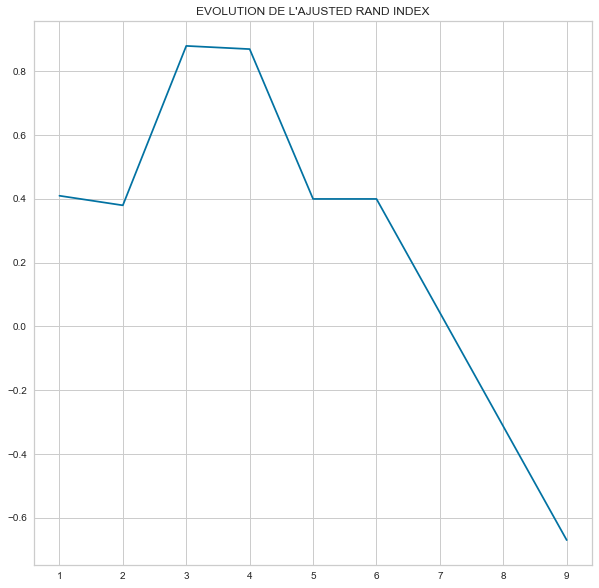

In [64]:
plt.figure(figsize=(10, 10))
plt.plot(data_ari2["Month"], data_ari2["Adjusted Rand Index"])
plt.title("EVOLUTION DE L'AJUSTED RAND INDEX")
plt.show()